In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from functools import partial

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
# session = tf.compat.v1.Session(config=config)
session = tf.compat.v1.InteractiveSession(config=config)

Num GPUs Available:  1


In [2]:
# model = keras.models.Sequential()
# model.add(InceptionV3(include_top=False, input_shape=(640, 480, 3),weights="imagenet", pooling='avg'))


In [3]:
# model.add(Flatten())
# model.add(Dense(units=5, activation='softmax'))


In [11]:
model = keras.models.Sequential()
DefaultConv2D = partial(keras.layers.Conv2D,kernel_size=2, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=11, input_shape=(320, 240, 3)),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=4),
    keras.layers.Flatten(),
    keras.layers.Dense(units=2000, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=1000,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=5, activation='softmax'),
    ])

In [12]:
model.summary()
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 320, 240, 64)      23296     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 160, 120, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 160, 120, 128)     32896     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 160, 120, 128)     65664     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 80, 60, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 80, 60, 256)       131328    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 40, 30, 256)      

In [6]:
my_dir = os.getcwd()  # grabs current work dir
all_file_paths = os.listdir()  # grabs all items in current work dir

FOLDER_TO_ACCESS = 'traindata_pp_structure'
data_path = [data for data in all_file_paths if FOLDER_TO_ACCESS in data.lower()]  # searches for data folder and retrieves
train_folder_path = os.path.join(my_dir, data_path[0])  # joins data folder and current work dir to get picture path
all_classifications = os.listdir(train_folder_path)  # list of classification fodlers

In [7]:
train_datagen = ImageDataGenerator(
    validation_split=0.2) # set validation split

train_it = train_datagen.flow_from_directory(
    train_folder_path,
    target_size = (320, 240),
    subset='training',
    class_mode='sparse',
    shuffle=True,
    batch_size=8)

validate_it = train_datagen.flow_from_directory(
    train_folder_path,
    target_size = (320, 240),
    subset='validation',
    class_mode='sparse',
    shuffle=True,
    batch_size=8)

Found 821 images belonging to 5 classes.
Found 204 images belonging to 5 classes.


In [21]:
history = model.fit(train_it,
                    steps_per_epoch=train_it.n // train_it.batch_size,
                    epochs=100, verbose=1,
                    callbacks=None, validation_data=validate_it,
                    validation_steps=None,
                    class_weight=None, max_queue_size=2,
                    workers=1, use_multiprocessing=False,
                    shuffle=False, initial_epoch=0)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 102 steps, validate for 26 steps
Epoch 1/100
102/102 [==============================] - 35s 347ms/step - loss: 0.0729 - accuracy: 0.9743 - val_loss: 4.3416 - val_accuracy: 0.7255
Epoch 2/100
102/102 [==============================] - 35s 347ms/step - loss: 0.1078 - accuracy: 0.9608 - val_loss: 6.0822 - val_accuracy: 0.7696
Epoch 3/100
102/102 [==============================] - 35s 347ms/step - loss: 0.1060 - accuracy: 0.9632 - val_loss: 22655.4500 - val_accuracy: 0.7402
Epoch 4/100
102/102 [==============================] - 35s 346ms/step - loss: 0.2878 - accuracy: 0.9277 - val_loss: 192688.3968 - val_accuracy: 0.5147
Epoch 5/100
102/102 [==============================] - 35s 347ms/step - loss: 0.2699 - accuracy: 0.9167 - val_loss: 54.7493 - val_accuracy: 0.7549
Epoch 6/100
102/102 [==============================] - 35s 347ms/step - loss: 0.1003 - accuracy: 0.9645 - val_loss: 1.3307 - val_accuracy: 0.7892
Epoch 7/100
102/102 [

Epoch 55/100
102/102 [==============================] - 35s 347ms/step - loss: 0.0267 - accuracy: 0.9926 - val_loss: 2.3597 - val_accuracy: 0.7647
Epoch 56/100
102/102 [==============================] - 35s 347ms/step - loss: 0.0136 - accuracy: 0.9963 - val_loss: 7246.7206 - val_accuracy: 0.7451
Epoch 57/100
102/102 [==============================] - 35s 346ms/step - loss: 0.0216 - accuracy: 0.9939 - val_loss: 10686.3841 - val_accuracy: 0.7549
Epoch 58/100
102/102 [==============================] - 35s 346ms/step - loss: 0.0208 - accuracy: 0.9926 - val_loss: 8838.4517 - val_accuracy: 0.7549
Epoch 59/100
102/102 [==============================] - 35s 347ms/step - loss: 0.0134 - accuracy: 0.9951 - val_loss: 2.0658 - val_accuracy: 0.7794
Epoch 60/100
102/102 [==============================] - 35s 347ms/step - loss: 0.0210 - accuracy: 0.9939 - val_loss: 3.6396 - val_accuracy: 0.7402
Epoch 61/100
102/102 [==============================] - 35s 347ms/step - loss: 0.0217 - accuracy: 0.9914 - v

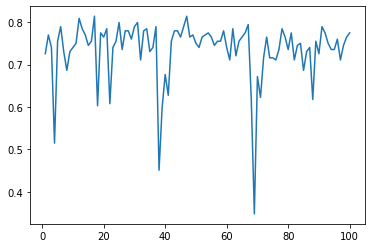

In [22]:
history.history
sns.lineplot(np.linspace(1,100,100), history.history['val_accuracy'])

In [20]:
len(history.history['loss'])

75

In [ ]:
# train_it.n // 2
# confirm the iterator works
# batchX, batchy = train_it.next()
# print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

# batchX[0].shape